In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.ndimage import rotate
from scipy.ndimage import zoom
from skimage import filters
from skimage import exposure
from scipy.ndimage import gaussian_filter
from scipy.ndimage import sobel

In [2]:
try:
    roomimage = imageio.imread('/kaggle/input/roomimage/room_image.png')
    print(f"The Shape Of Image is:",roomimage.shape)
except FileNotFoundError:
    print('file not found erro')

The Shape Of Image is: (520, 780, 3)


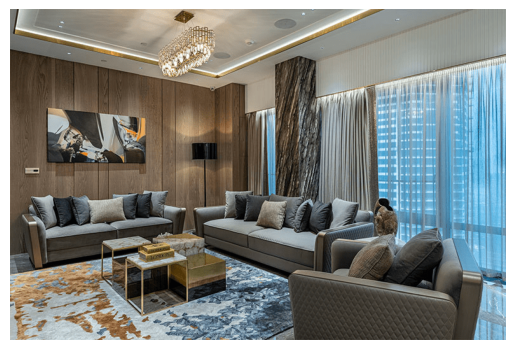

In [3]:
plt.imshow(roomimage)
plt.axis('off')
plt.show()

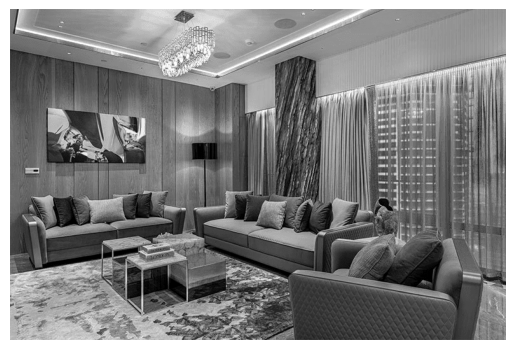

In [4]:
grayscale_image = roomimage[:, :, 0] * 0.563  
plt.imshow(grayscale_image, cmap = 'gray')
plt.axis('off')
plt.show()

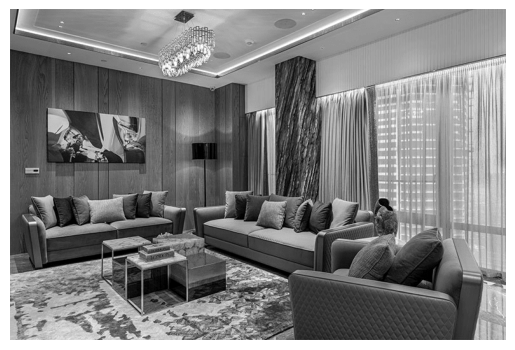

In [5]:
grayscale_image = roomimage[:, :, 1] * 0.4 
plt.imshow(grayscale_image, cmap = 'gray')
plt.axis('off')
plt.show()

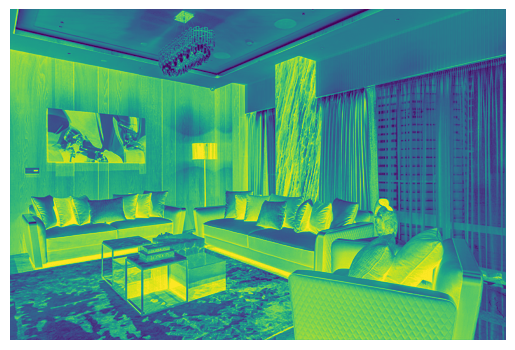

In [6]:
negative_image = 255 - grayscale_image
plt.imshow(negative_image)
plt.axis('off')
plt.show()

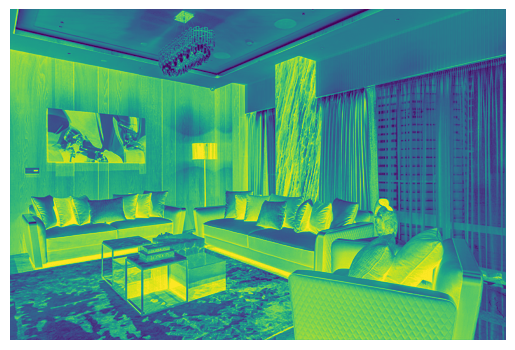

In [7]:
negative_image_2 = 24 - grayscale_image
plt.imshow(negative_image_2)
plt.axis("off")
plt.show()

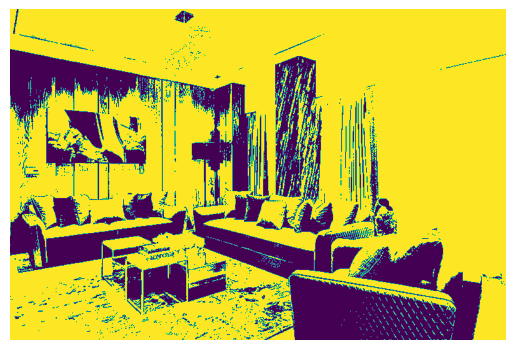

In [8]:
binary_image = (grayscale_image > 30)
plt.imshow(binary_image)
plt.axis('off')
plt.show()

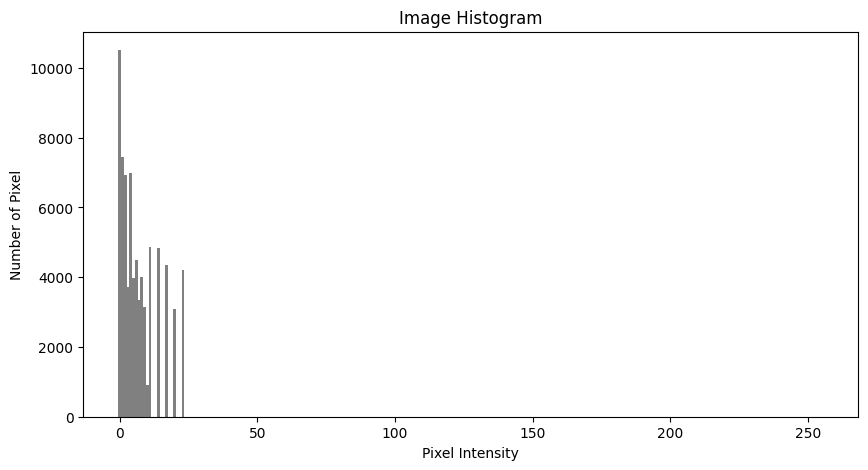

In [9]:
histogram, bin_edges = np.histogram(negative_image_2, bins = 256, range = (0, 256))
plt.figure(figsize = (10, 5))
plt.bar(bin_edges[:-1], histogram, width = 1, color = 'gray')
plt.title('Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixel')
plt.show()

# Normalized Image

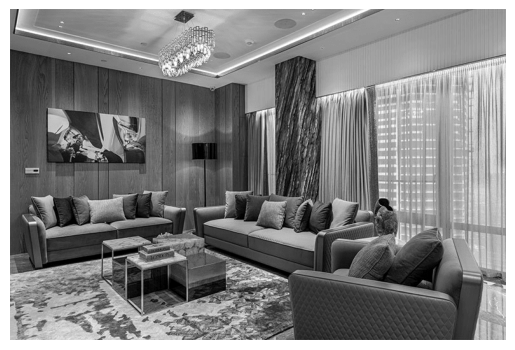

In [10]:
normalized_image = (grayscale_image - np.min(grayscale_image)) / (np.max(negative_image_2))
plt.imshow(normalized_image, cmap = 'gray')
plt.axis('off')
plt.show()

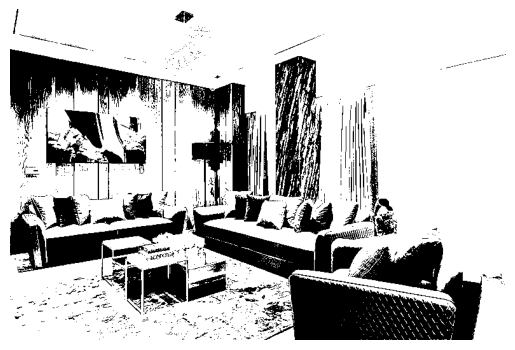

In [11]:
normal_image = (binary_image - np.min(grayscale_image)) / (np.max(grayscale_image))
plt.imshow(normal_image, cmap = "gray")
plt.axis("off")
plt.show()

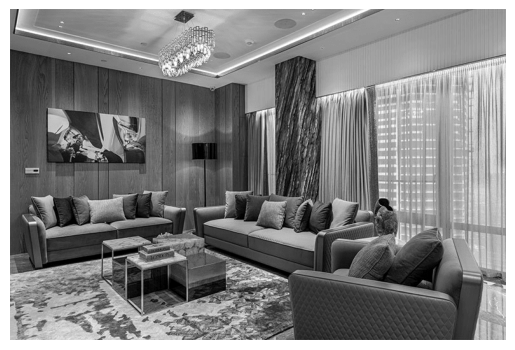

In [12]:
normalized_image1 = (grayscale_image - np.max(grayscale_image)) / (np.min(grayscale_image))
plt.imshow(normalized_image, cmap = 'gray')
plt.axis('off')
plt.show()

# Flipped Images

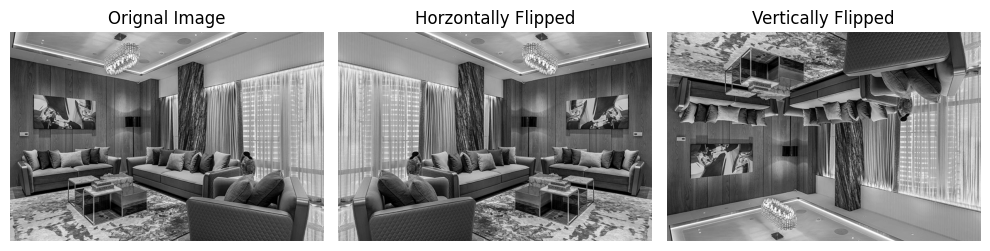

In [13]:
# flpping the grayscale image horizonatally
flipped_horizontal = np.fliplr(grayscale_image)
#flipping the grayscale image vertically
flipped_vertical = np.flipud(grayscale_image)

fig, ax = plt.subplots(1, 3, figsize = (10, 5))

ax[0].imshow(grayscale_image, cmap = 'gray')
ax[0].axis('off')
ax[0].set_title('Orignal Image')
ax[1].imshow(flipped_horizontal, cmap = 'gray')
ax[1].axis('off')
ax[1].set_title('Horzontally Flipped')

ax[2].imshow(flipped_vertical, cmap = 'gray')
ax[2].axis('off')
ax[2].set_title('Vertically Flipped')

plt.tight_layout()
plt.show()


# Rotated Image

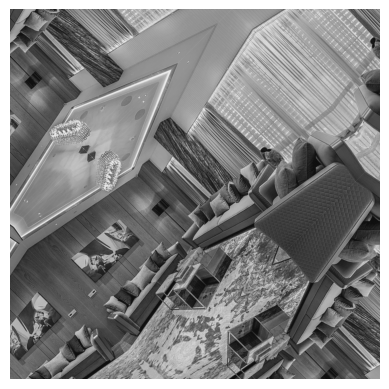

In [14]:
rotated_image = rotate(grayscale_image, angle = 45, mode = 'reflect')
plt.imshow(rotated_image, cmap = 'gray')
plt.axis('off')
plt.show()

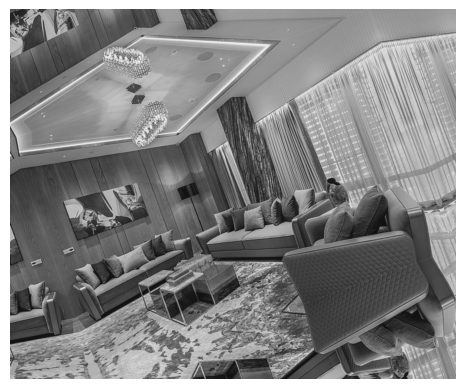

In [15]:
rotated_image1 = rotate(grayscale_image, angle = 20, mode = 'reflect')
plt.imshow(rotated_image1, cmap = 'gray')
plt.axis('off')
plt.show()

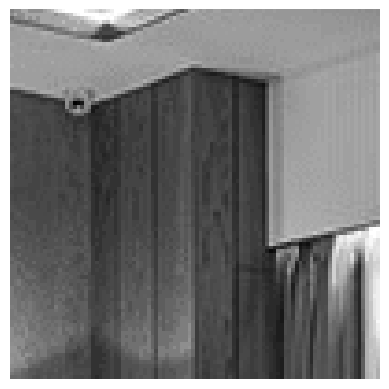

In [16]:
y1, y2, x1, x2 = 100, 200, 300, 400 
cropped_image = grayscale_image[y1:y2, x1:x2]

plt.imshow(cropped_image, cmap = 'gray')
plt.axis('off')
plt.show()

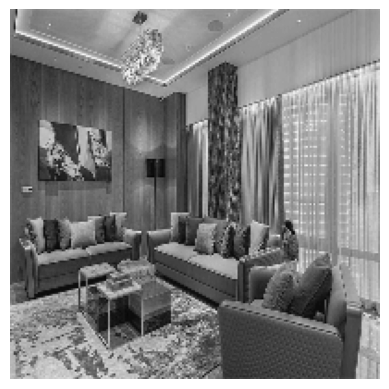

In [17]:
# Calculating the scaling factors for height and width..

height_scale = 200 / grayscale_image.shape[0]
width_scale = 200 / grayscale_image.shape[1]

# Resizing the grayscale_image.
resized_image = zoom(grayscale_image, (height_scale, width_scale))

# Displaying the resized image.
plt.imshow(resized_image, cmap = 'gray')
plt.axis('off')
plt.show()

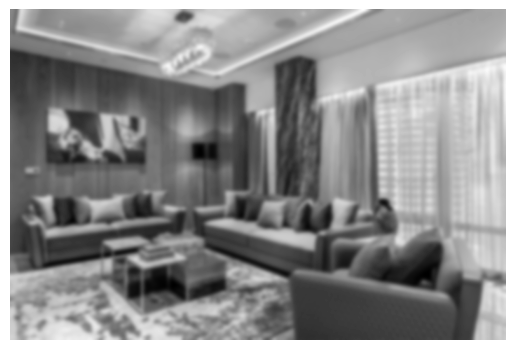

In [18]:
# Applying the gaussian filter to the grayscale image.
blurred_image = gaussian_filter(grayscale_image, sigma = 3)

# Displaying the blurred_image without axis.
plt.imshow(blurred_image, cmap = 'gray')
plt.axis('off')
plt.show()

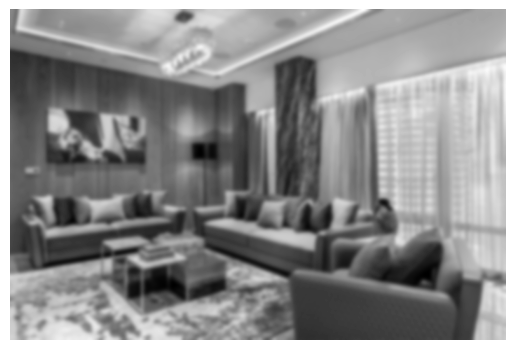

In [19]:
blured_image = gaussian_filter(grayscale_image, sigma = 10)

plt.imshow(blurred_image, cmap = 'gray')
plt.axis('off')
plt.show()

# Applying Sobel

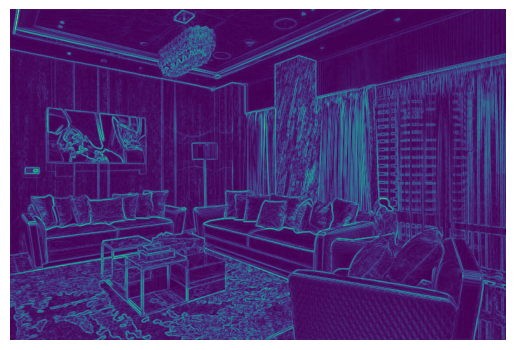

In [20]:
# Applying sobel operator to  detect edges
sobel_x = sobel(grayscale_image, axis = 0)  
sobel_y = sobel(grayscale_image, axis = 1)
edge_image = np.hypot(sobel_x, sobel_y)

plt.imshow(edge_image)
plt.axis('off')
plt.show()

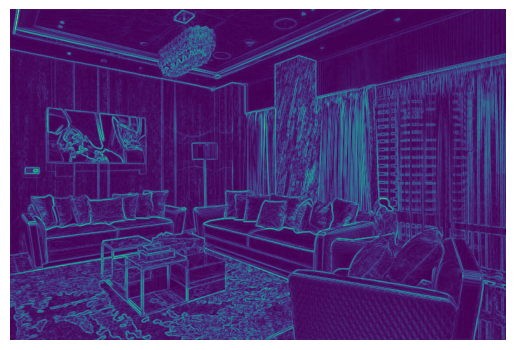

In [21]:
sobel_1 = sobel(grayscale_image, axis = 1)
sobel_2 = sobel(grayscale_image, axis = 0)
edges = np.hypot(sobel_1, sobel_2)

plt.imshow(edges)
plt.axis('off')
plt.show()

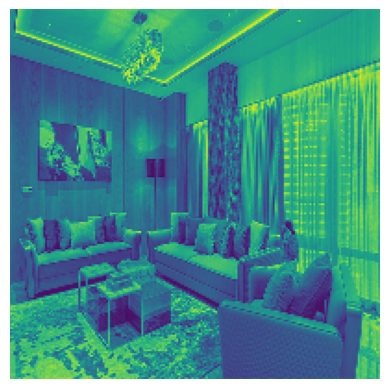

In [22]:
resize_factor_y = 200 / grayscale_image.shape[0]
resize_factor_x = 200 / grayscale_image.shape[1]
resized_image = zoom(grayscale_image, (resize_factor_y, resize_factor_x))

plt.imshow(resized_image)
plt.axis('off')
plt.show()

In [23]:

# Importing a gaussian_filter from the library of scipy.


# **Gaussian Filter**
# 
If you put the negative value in the sigma then it will not blurred the image and when you put the positive value like 2,3,5 then it will blurred the image according to the number.

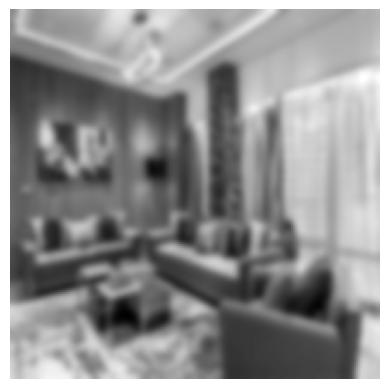

In [24]:
blurred_image = gaussian_filter(resized_image, sigma = 2
                               )

plt.imshow(blurred_image, cmap = 'gray')
plt.axis('off')
plt.show()

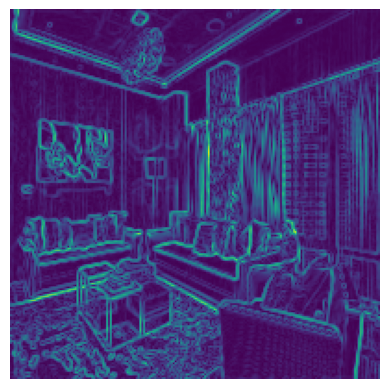

In [25]:
sobel_horizontal = sobel(resized_image, axis = 0)
sobel_vertical = sobel(resized_image, axis = 1)

edge_map = np.hypot(sobel_horizontal, sobel_vertical)

plt.imshow(edge_map)
plt.axis('off')
plt.show()

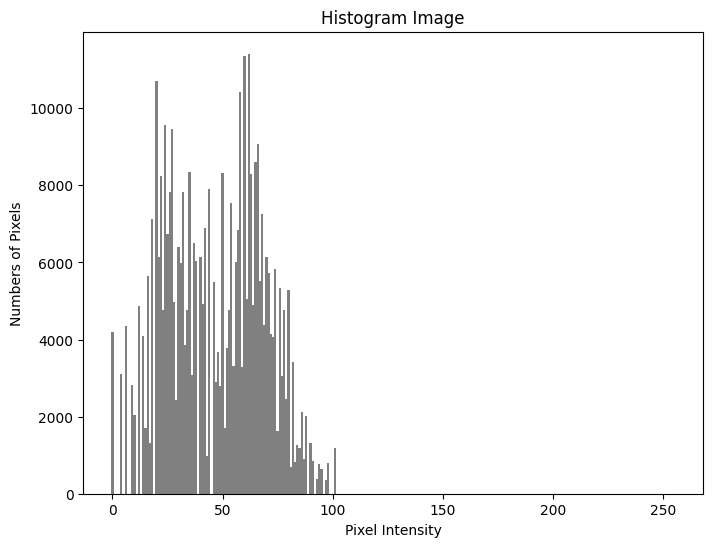

In [26]:
# Computing the histogram from resized_image.

histogram, bin_edges = np.histogram(grayscale_image, bins = 256, range = (0, 256))

plt.figure(figsize=(8,6))
plt.bar(bin_edges[:-1], histogram, width = 1, color = 'gray')
plt.title('Histogram Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Numbers of Pixels')
plt.show()

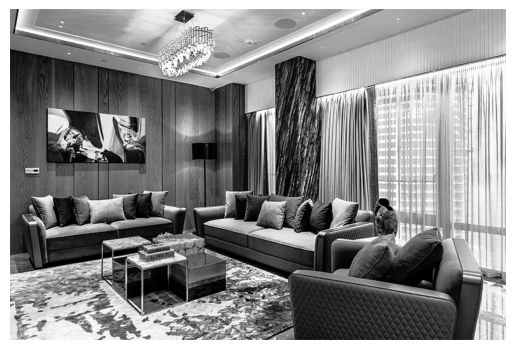

In [27]:
# Applying histogam equalitzation
equalized_image = exposure.equalize_hist(grayscale_image) * 255
equalized_image = equalized_image.astype(np.uint8)

#Displaying the image.
plt.imshow(equalized_image, cmap = 'gray')
plt.axis('off')
plt.show()

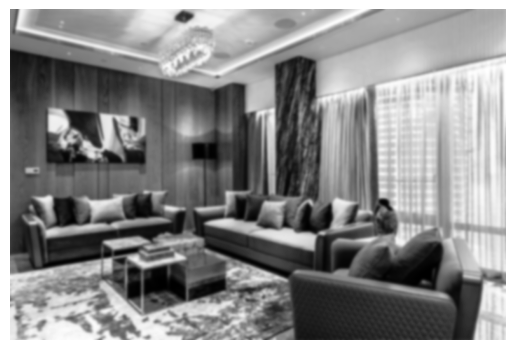

In [28]:
blurred_image = filters.gaussian(equalized_image, sigma = 2)

plt.imshow(blurred_image, cmap = 'gray')
plt.axis('off')
plt.show()


# Applying Gussian Filter

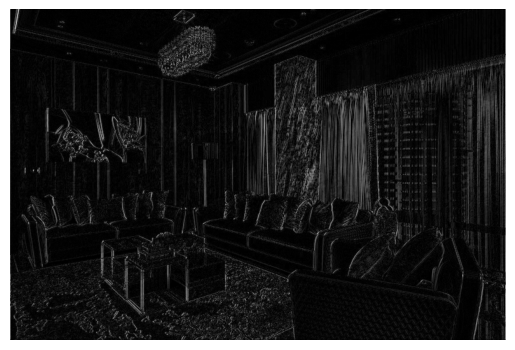

In [29]:
# Sobel Kernal

sobel_x = np.array([[1,-1,0],[-2,0,2],[-1,0,1]])
sobel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

# Function to apply convolution.
def convolve2d(image, kernal):
    output = np.zeros_like(image)
    image_padded = np.pad(image, ((1,1),(1,1)), mode = 'constant')
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            output[y,x] = (kernal * image_padded[y: y+3, x: x+3]).sum()
    return output

 # Applying sobel filter
gradient_x = convolve2d(grayscale_image, sobel_x)
gradient_y = convolve2d(grayscale_image, sobel_y)
gradient_magnitude = np.sqrt(gradient_x**2, gradient_y**2)

# Displying the gradient magnitude (edge)
plt.imshow(gradient_magnitude, cmap = 'gray')
plt.axis('off')
plt.show()